In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
df = pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


From this we can observe that the dataset has 9 columns of float datatype 1 column of integer datatype and 2 columns of string datatype.

In [4]:
df.shape

(158, 12)

We have 158 rows and 12 columns including the target column.

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


By looking at this table we can say that their is very less skewness in the dataset however their is a possible outlier at the happiness rank column.

In [6]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

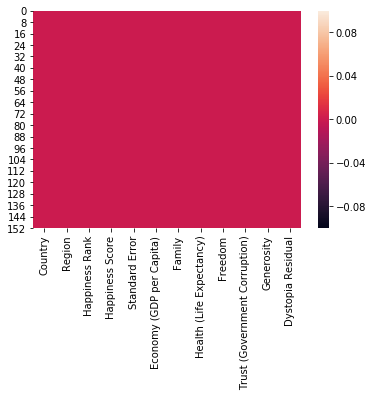

In [7]:
sns.heatmap(df.isnull())

By looking at the heatmap we can say that there is no null values in dataset.

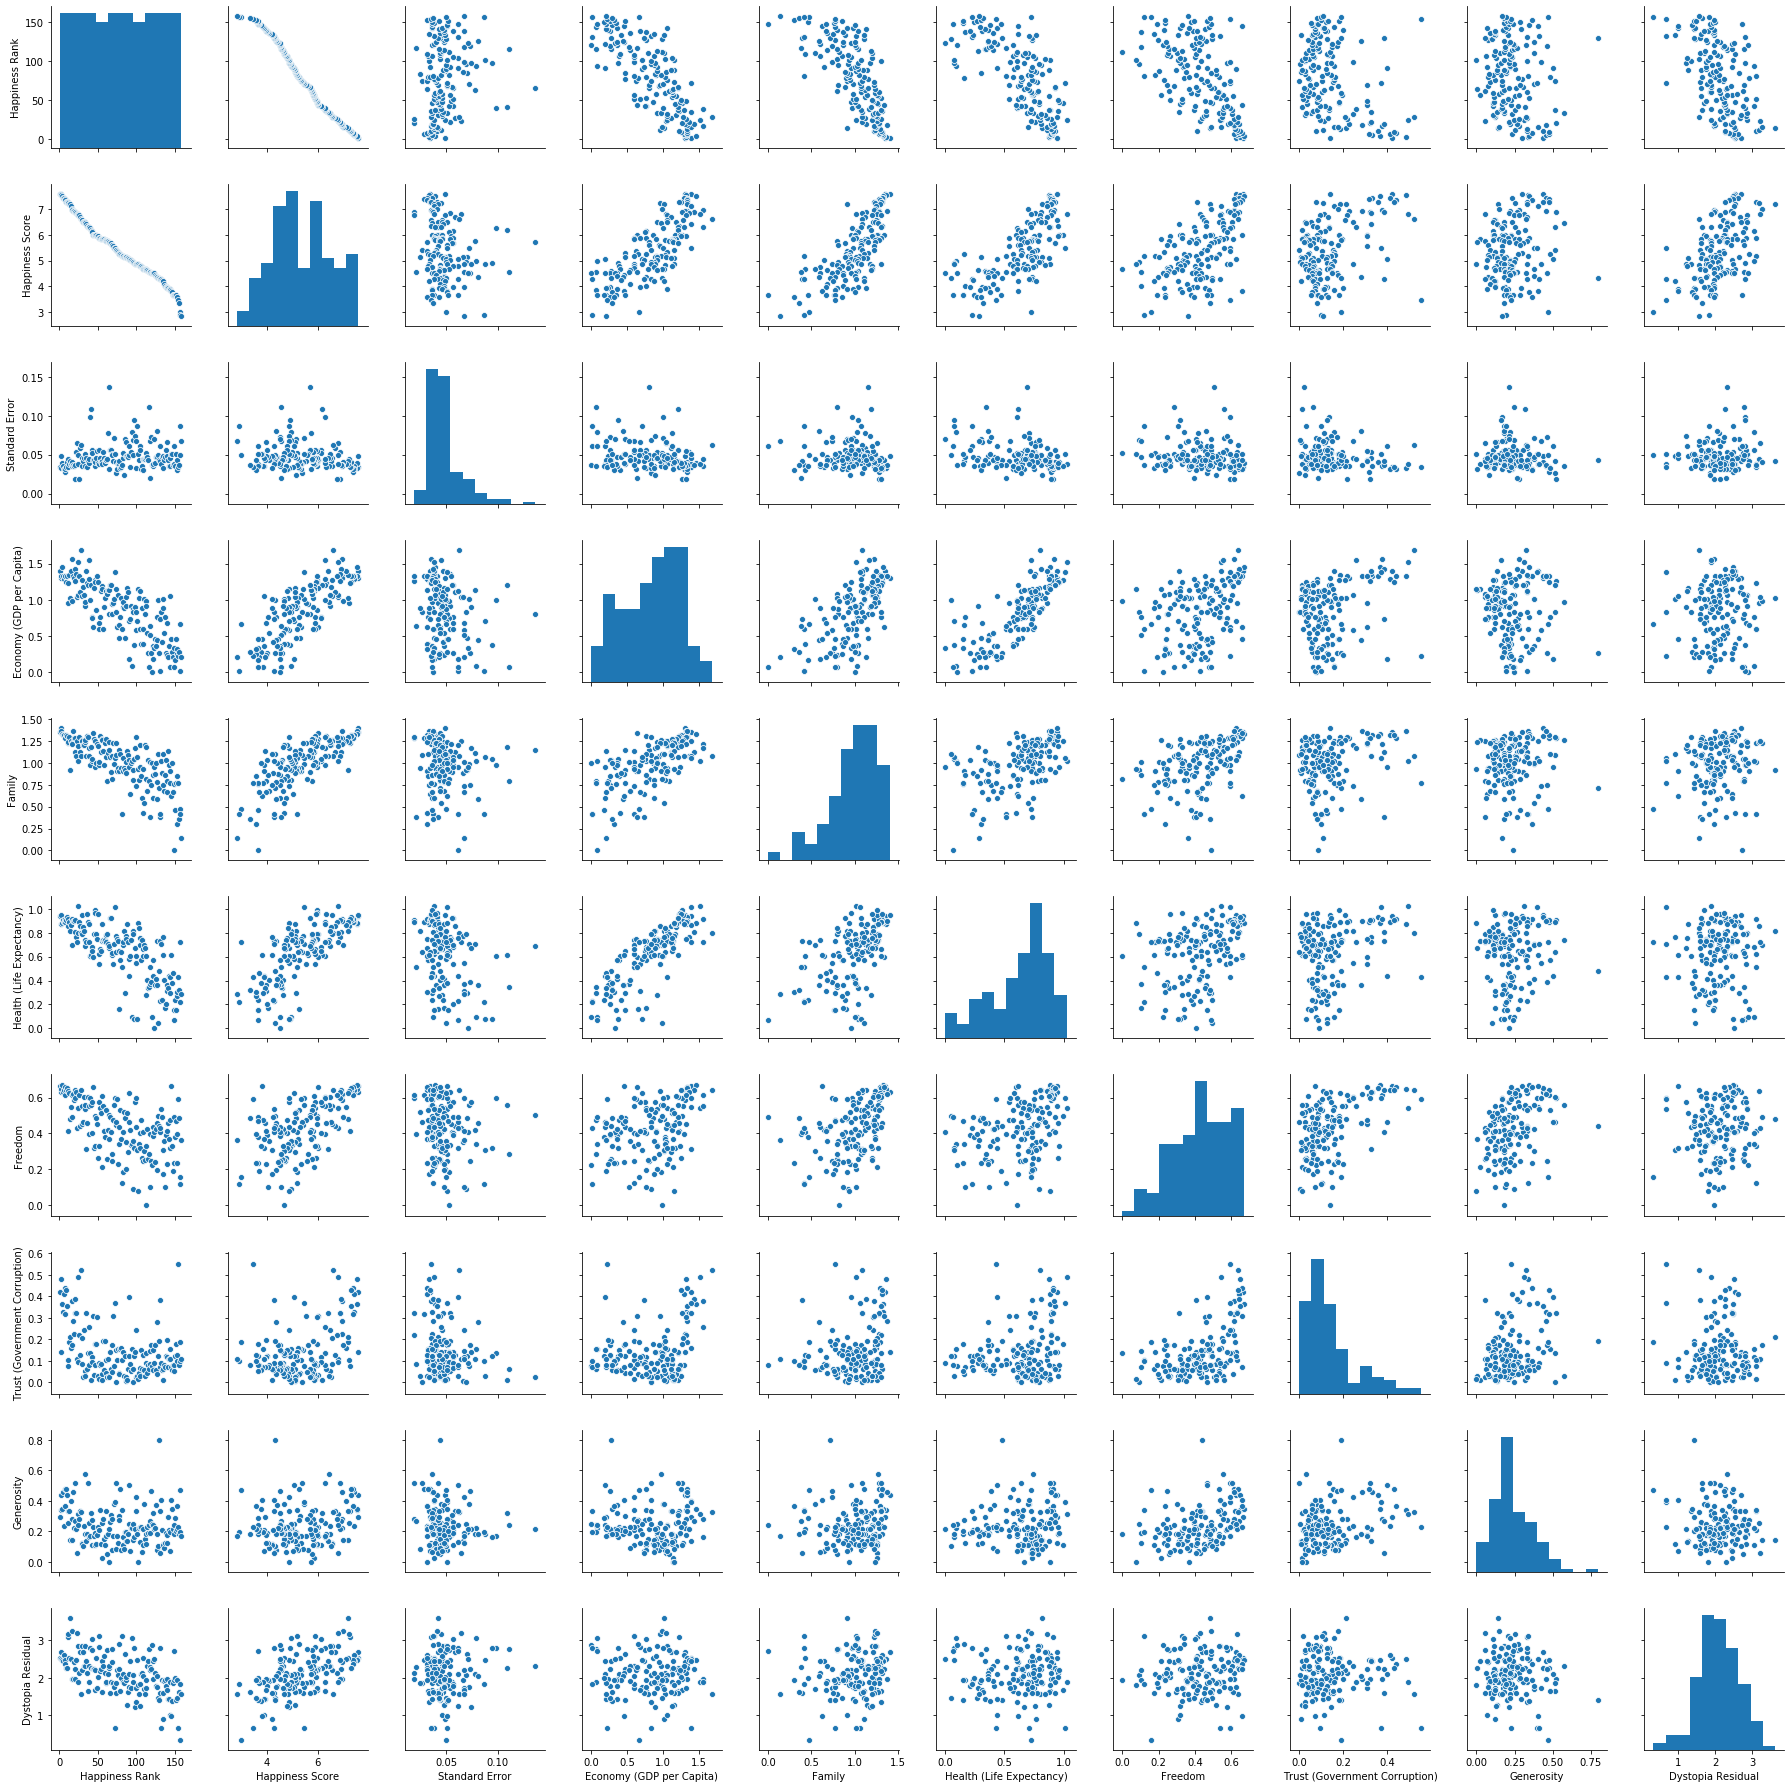

In [8]:
sns.pairplot(df)

# Checking Correlation

In [9]:
corr_mat=df.corr()

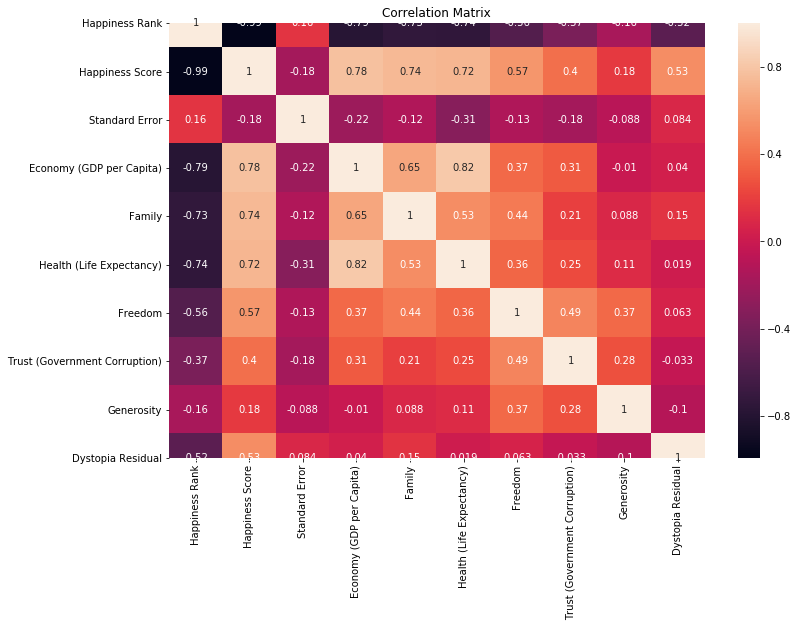

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Checking Skewness in data

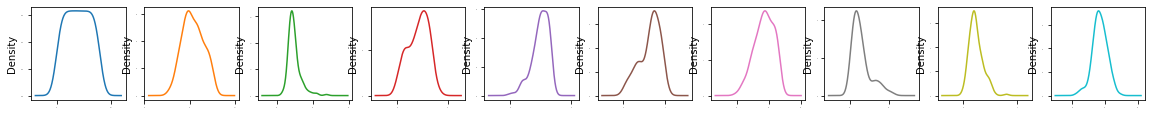

In [11]:
df.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False, fontsize=1, figsize=(22,12))
plt.show()

In [12]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [14]:
x=df.drop(["Happiness Score","Country","Region"],axis=1)
y=df["Happiness Score"]

In [15]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)
df_new = pd.DataFrame(df_new, columns=x.columns)

ValueError: The Box-Cox transformation can only be applied to strictly positive data

In [16]:
df_new.skew()

NameError: name 'df_new' is not defined

In [17]:
df_new.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False, fontsize=1, figsize=(22,12))
plt.show()

NameError: name 'df_new' is not defined

# Finding Best Random State

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y = y.round()

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.9375  on random_state  25


# Creating train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= .30,random_state=25)

In [22]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9375
[[ 8  0  0  0]
 [ 0 21  0  0]
 [ 0  1 11  0]
 [ 0  0  2  5]]
              precision    recall  f1-score   support

         4.0       1.00      1.00      1.00         8
         5.0       0.95      1.00      0.98        21
         6.0       0.85      0.92      0.88        12
         7.0       1.00      0.71      0.83         7

   micro avg       0.94      0.94      0.94        48
   macro avg       0.95      0.91      0.92        48
weighted avg       0.94      0.94      0.94        48



In [23]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9791666666666666
[[ 8  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  6  1]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

         4.0       1.00      1.00      1.00         8
         5.0       1.00      1.00      1.00        21
         6.0       1.00      1.00      1.00        12
         7.0       1.00      0.86      0.92         7
         8.0       0.00      0.00      0.00         0

   micro avg       0.98      0.98      0.98        48
   macro avg       0.80      0.77      0.78        48
weighted avg       1.00      0.98      0.99        48



In [24]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9375
[[ 8  0  0  0]
 [ 0 20  1  0]
 [ 0  1 11  0]
 [ 0  0  1  6]]
              precision    recall  f1-score   support

         4.0       1.00      1.00      1.00         8
         5.0       0.95      0.95      0.95        21
         6.0       0.85      0.92      0.88        12
         7.0       1.00      0.86      0.92         7

   micro avg       0.94      0.94      0.94        48
   macro avg       0.95      0.93      0.94        48
weighted avg       0.94      0.94      0.94        48



In [25]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[ 8  0  0  0]
 [ 0 21  0  0]
 [ 0  0 12  0]
 [ 0  0  0  7]]
              precision    recall  f1-score   support

         4.0       1.00      1.00      1.00         8
         5.0       1.00      1.00      1.00        21
         6.0       1.00      1.00      1.00        12
         7.0       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



We are getting highest accuracy with Random Forest and Decision Tree classifier with(98%) but it can be due to overfitting so we will check the cross validation score.

In [26]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross Validation Score for Logistic Regression model :",scr.mean())

Cross Validation Score for Logistic Regression model : 0.7882813816698688


In [27]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score for Decision Tree model :",scr.mean())

Cross Validation Score for Decision Tree model : 0.8010645245559038


In [28]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score for Random Forest model :",scr.mean())

Cross Validation Score for Random Forest model : 0.7946668436309705


In [29]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score for SVC model :",scr.mean())

Cross Validation Score for SVC model : 0.8069235177132841


Minimum Difference in accuracy and cross validation score is of Random forest classifier so this is our best model.

# Saving the Model

In [30]:
import joblib
joblib.dump(mod,"Happiness1RFC.pk1")

NameError: name 'mod' is not defined